# New York Airbnb EDA

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# split para modelado
from sklearn.model_selection import train_test_split
# Scaled | Escalado
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Encoding | Codificación
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
# To save models
import json
import pickle
# Feature Selection
from sklearn.feature_selection import f_classif, SelectKBest

## Paso 1: Planteamiento del problema

> '¿Cuánto costará el alojamiento en función del tipo de alojamiento y la ubicación?'

## Paso 2: Recopilación de datos

In [2]:
df = pd.read_csv('https://breathecode.herokuapp.com/asset/internal-link?id=927&path=AB_NYC_2019.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Obtain dimensions
df.shape

(48895, 16)

In [4]:
# Obtain information about tada types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
# Display descriptive statistics for each column of the DataFrame, transposed (T) for better readability
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


In [6]:
df['availability_365'].value_counts()

availability_365
0      17533
365     1295
364      491
1        408
89       361
       ...  
195       26
196       24
183       24
181       23
202       20
Name: count, Length: 366, dtype: int64

> ### Observaciones:
>
> - Existen un total de 48895 filas (en este caso, alojamientos) y 16 columnas
> - Las variables `Last_review` y `Reviews_per_month` tienen 38843 instancias con valores, por lo que contendría más de 1000 valores nulos.
> - Las variables `Name` y `Host_name` también cuentan con valores nulos, pero en un número mucho más reducido que las anteriores.
> - El resto de variables cuentan siempre con valor.
> - Los datos cuentan con 10 características numéricas y 6 características categóricas.

## Paso 3: Limpieza de Datos

### Limpieza de datos: Eliminar duplicados

In [7]:
df_original = df.copy()
df_original

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [8]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [9]:
# To find complete duplicate rows
df.drop('id', axis=1).duplicated().sum()

np.int64(0)

In [10]:
# To detect duplicate values in a single column
df['name'].duplicated().sum()

np.int64(989)

In [11]:
df['host_id'].duplicated().sum()

np.int64(11438)

>  ### Observaciones
>
> No encontramos ninguna fila duplicada. Por otro lado, si revisamos algunos datos de cada columna, en este caso, de columna `name` y columna `host_id` podemos ver que hay datos duplicados, pero es normal porque un anfitrión puede tener varios alojamientos publicados y los nombres de los alojamientos suelen ser muy parecidos en Airbnb y algunos pueden ser iguales. 

### Limpieza de datos: Eliminar información irrelevante

En función del objetivo planteado hay varios datos que no son relevantes para el análisis. 

> ### Conclusión:
>
> Los variables como id, nombre del alojamiento, id del anfitrión y su nombre son datos sencillos que realmente no afecta mi analisis y no tiene relación con mi target - precio. Las variables de último comentario y comentarios por mes tienen muchas valones null y tampoco afectará mi analisis sobre el precio. 
> Definimos que las variables que el algoritmo no utilizará en el proceso predictivo son:
 >
 > `Id`, `Name`, `Host_Id` , `Host_Name`, `Last_review` y `Reviews_per_month`.

In [12]:
df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0
...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,6,2


## Paso 4: Análisis de Variables

#### Añálisis de Variable Univariante Categóricas

En este caso, las variables categóricas son: `Neighbourhood_group`, `Room_type`, `Neighbourhood` y `Availability_365`.

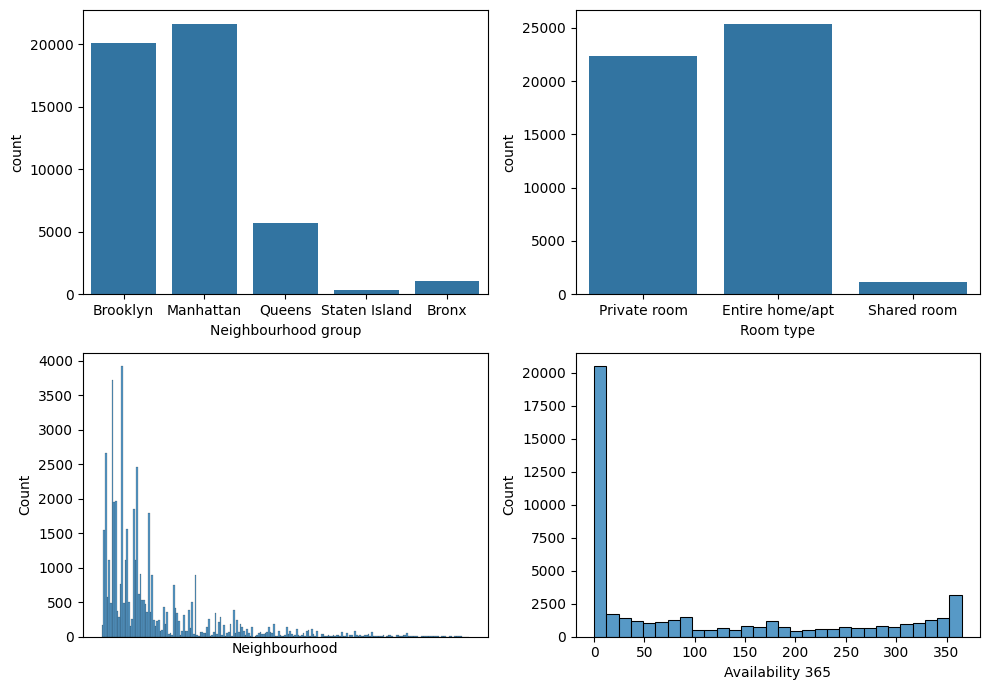

In [13]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

sns.countplot(ax=axis[0,0], data=df, x='neighbourhood_group')
axis[0,0].set_xlabel('Neighbourhood group')
sns.countplot(ax=axis[0,1], data=df, x='room_type')
axis[0,1].set_xlabel('Room type')
sns.histplot(ax=axis[1,0], data=df, x='neighbourhood').set_xticks([])
axis[1,0].set_xlabel('Neighbourhood')
sns.histplot(ax=axis[1,1], data=df, x='availability_365').set(xlabel=None)
axis[1,1].set_xlabel('Availability 365')

plt.tight_layout()
plt.show()

> #### Observaciones 
>
> - **Neighbourhood group**: La mayoria de los alojamientos se encuentra en Brooklyn y Manhattan. 
> - **Room type**: Más de 25000 alojamientos son apartamentos o casas enteros y hay muy pocos alojamientos con las habitaciones compartidas.
> - **Neighbourhood**: Podemos ver que la variable presenta una alta cantidad de categorías (barrios), donde la mayoría de los barrios tienen pocos listados, mientras que unos pocos concentran la mayor parte de las propiedades disponibles. 
> - **Availability 365**: Hay muchos alojamientos con la disponibilidad nula, puede ser un error y tienen al calendario cerrado por varios razones, por otro lado más de 3000 alojamientos tiene la disponibilidad todo el año. 

#### Análisis de Variables Univariante Numéricas 

En este caso son: `Price`, `Minimum_nights`, `Number_of_reviews` , `Latitude` , `Longitude`.

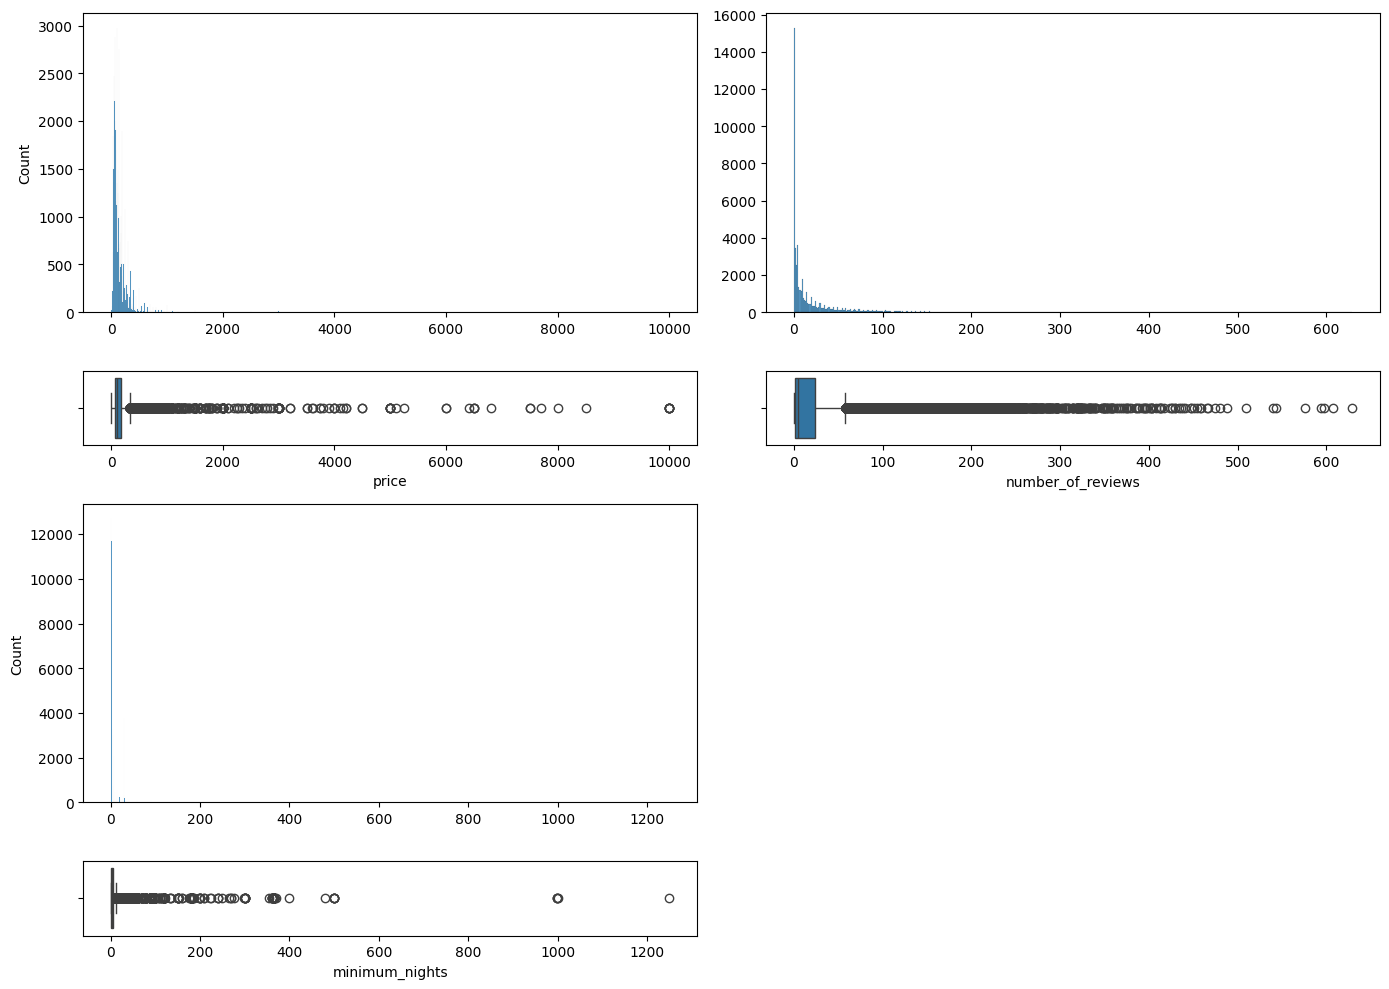

In [14]:
fig, axis = plt.subplots(4, 2, figsize=(14, 10), gridspec_kw={'height_ratios': [4, 1, 4, 1]})

# Creating a multiple figure with histograms and box plots
sns.histplot(ax=axis[0, 0], data=df, x='price').set(xlabel=None)
sns.boxplot(ax=axis[1, 0], data=df, x='price')
sns.histplot(ax=axis[0, 1], data=df, x='number_of_reviews').set(xlabel=None, ylabel=None)
sns.boxplot(ax=axis[1, 1], data=df, x='number_of_reviews')
sns.histplot(ax=axis[2, 0], data=df, x='minimum_nights').set(xlabel=None)
sns.boxplot(ax=axis[3, 0], data=df, x='minimum_nights')

# Remove an axis (subplot) from the figure
fig.delaxes(axis[2,1])
fig.delaxes(axis[3,1])

# Adjust the layout
plt.tight_layout()
plt.show()

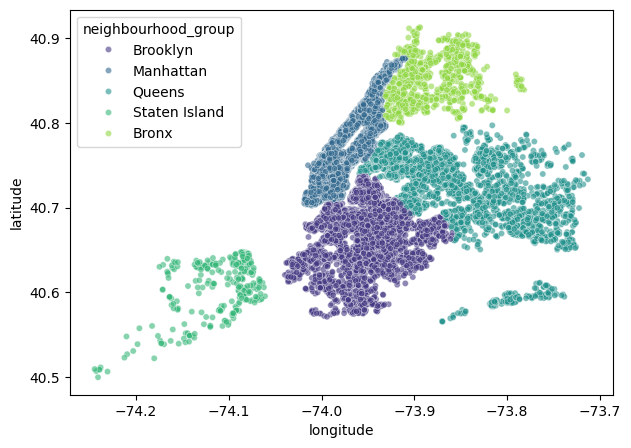

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='neighbourhood_group', palette='viridis', alpha=0.6, s=20)
plt.show()

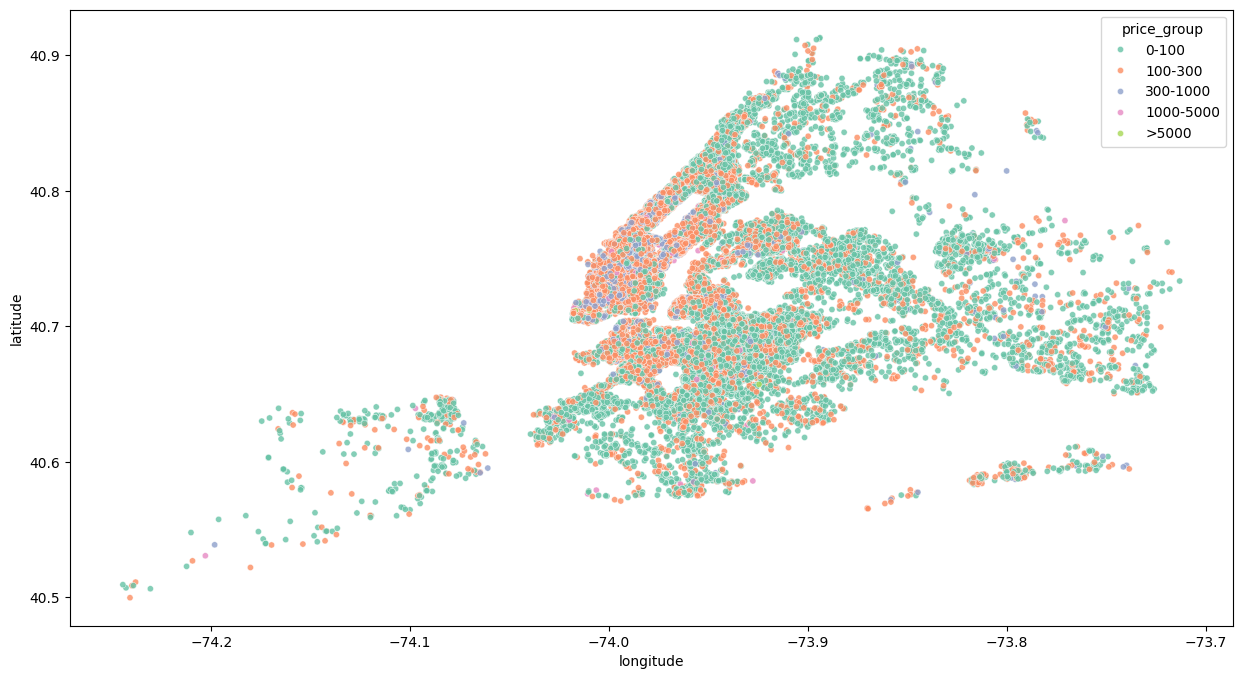

In [16]:
bins = [0, 100, 300, 1000, 5000, df['price'].max()]
labels = ['0-100', '100-300', '300-1000', '1000-5000', '>5000']
df['price_group'] = pd.cut(df['price'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(15,8))
sns.scatterplot(data=df, x='longitude', y='latitude', hue='price_group', palette='Set2', alpha=0.8, s=20)
plt.show()



> #### Observaciones:
>
> - **Price**: La mayoría de los precios son bajos, entre 0 y 300, hay una concentración muy alta de valores cerca de 0. 
> - **Number of reviews**: Existen muchos alojamientos cuales todavía no tienen ningun comentario. 
> - **Minimum nights**: Gran mayoría de los valores son bajos, por lo cual podemos decir que la mayoría de los alojamientos tiene una estancia minima establecida de menos de 5 noches. 
> - **Longitud y latitude**: Se distingen claramente las diferentes zonas y del segundo gráfico podemos confirmar que la mayoría de precios son hasta 100. El rango de 100 hasta 300 se concentra en la ciudad de Manhattan. 

#### Análisis de variable multivariante

#### Análisis numérico-numérico

##### Price - (Number of reviews, Minimum nights)

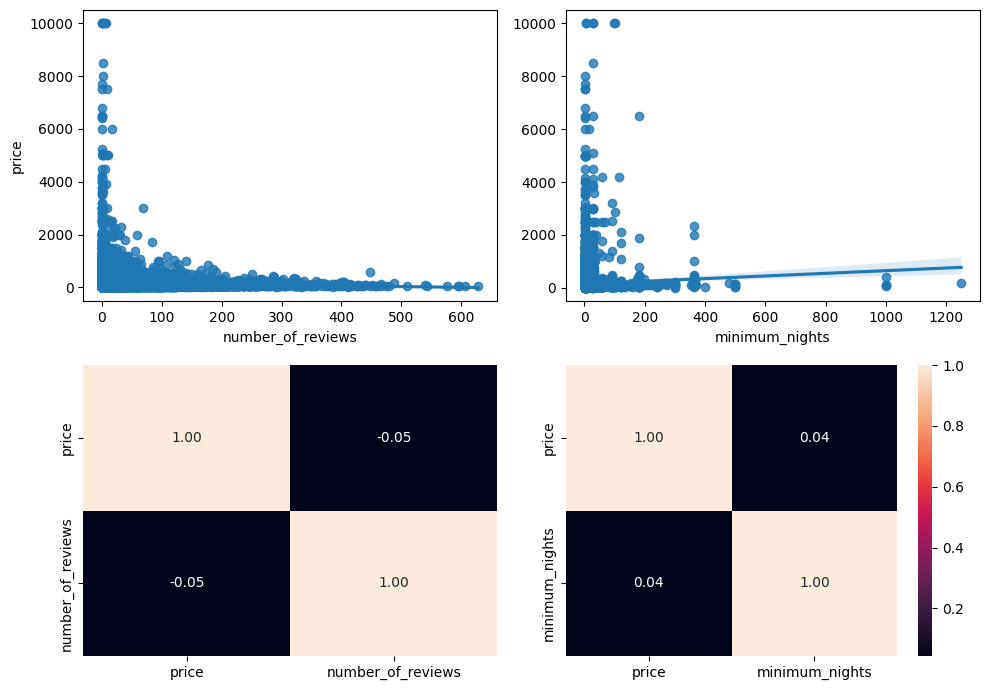

In [17]:
fig, axis = plt.subplots(2, 2, figsize=(10, 7))

# Create a multiple scatter diagram
sns.regplot(ax=axis[0, 0], data=df, x='number_of_reviews', y='price')
sns.heatmap(df[['price', 'number_of_reviews']].corr(), annot=True, fmt='.2f', ax=axis[1, 0], cbar=False)
sns.regplot(ax=axis[0, 1], data=df, x='minimum_nights', y='price').set(ylabel=None)
sns.heatmap(df[['price', 'minimum_nights']].corr(), annot=True, fmt='.2f', ax=axis[1, 1])

# Adjust the layout
plt.tight_layout()
plt.show()

> ##### Observaciones

> - Existe una relación ligeramente negativa (aunque muy débil) entre el precio del alojamiento y el número de reviews que tiene `Number of reviews`. Esto indica que los alojamientos más caros tienden a tener un poco menos de reseñas, aunque el efecto es tan pequeño que no se puede considerar una relación significativa.
> - También existe una relación ligeramente positiva (aunque también muy débil), entre `Minimum nights` y el 'target'. 

En resumen, aunque hay pequeñas asociaciones entre estas variables y el precio, ninguna muestra una correlación fuerte. Por lo tanto, no parecen ser factores determinantes para explicar las variaciones en el precio del alojamiento.

##### Number of reviews - Minimum nights

A continuación también podemos relacionar ambas variables para determinar su grado de afinidad o correlación:

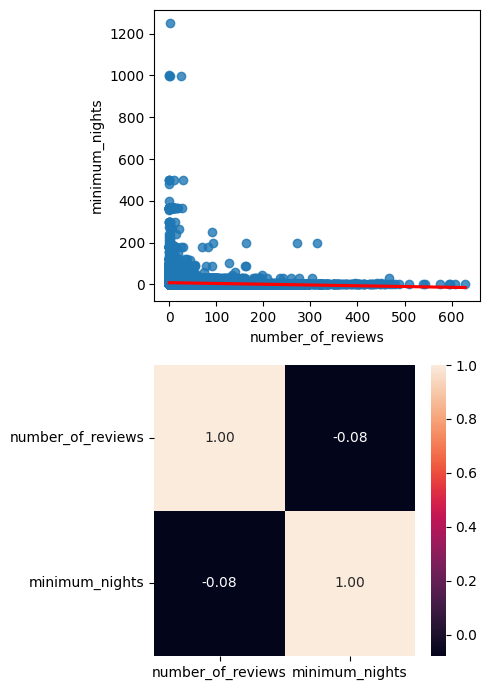

In [18]:
# To generate the correlation between two
corr_reviews_nights = df[['number_of_reviews', 'minimum_nights']].corr()

fig, axis = plt.subplots(2, 1, figsize=(5, 7))

sns.regplot(ax=axis[0], data=df, x="number_of_reviews", y="minimum_nights", line_kws={'color': 'red'})
sns.heatmap(ax=axis[1], data=corr_reviews_nights, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> Se puede determinar que no existe una relación fuerte entre ambas variables y que el número de reviews no influye en la cantidad de minimum nights.

#### Análisis categórico-categórico

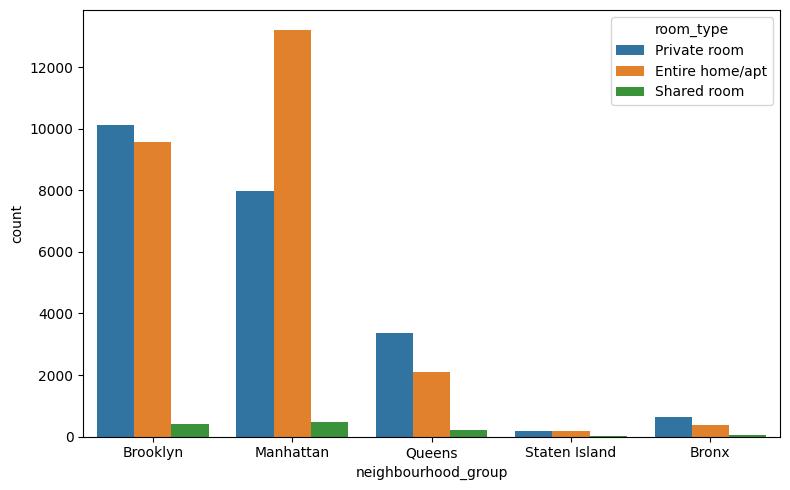

In [19]:
fig, axis = plt.subplots(1, 1, figsize=(8, 5))

sns.countplot(ax=axis, data=df, x='neighbourhood_group', hue='room_type')

plt.tight_layout()
plt.show()

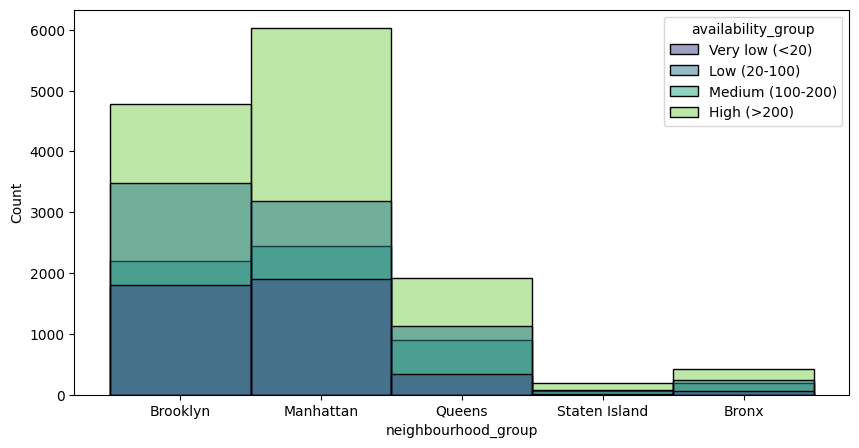

In [20]:
df['availability_group'] = pd.cut(df['availability_365'], bins=[0, 20, 100, 200, 365], labels=['Very low (<20)', 'Low (20-100)', 'Medium (100-200)', 'High (>200)'])
plt.figure(figsize=(10,5))
sns.histplot(data=df, x='neighbourhood_group', hue='availability_group', bins=4, palette='viridis')
plt.show()

> ##### Observaciones:
>
> De los gráficos anteriores podemos obtener las siguientes conclusiones:
>
> - En Manhattan, la mayoría de los alojamientos son apartamentos o casas enteras, mientras que en **Brooklyn** predominan las **habitaciones privadas**.
> - La disponibilidad de más de 200 noches se concentra principalmente en Manhattan. En cambio, para estancias de **menos de 20 noches**, Brooklyn y Manhattan presentan cantidades muy **similares**.


##### Combinaciones del target con varias predictoras

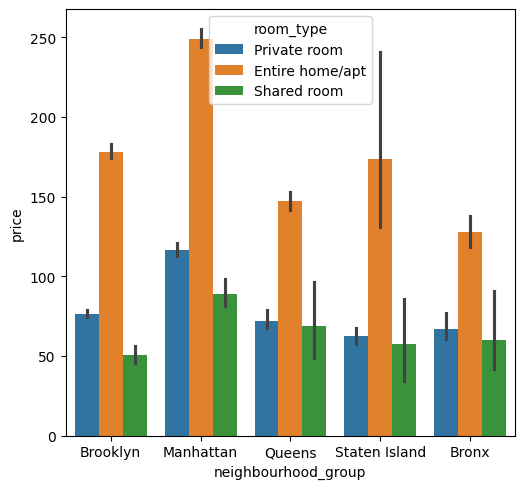

In [21]:
fig, axis = plt.subplots(figsize=(10, 5), ncols=2)   # Create a figure with two columns of subplots (axes) in a single row

sns.barplot(ax=axis[0], data=df, x='neighbourhood_group', y='price', hue='room_type')

fig.delaxes(axis[1])
plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> De ese análisis se observa claramente que:
>
> - El precio de los apartamentos o casas completas es más alto en comparación con otros tipos de alojamiento, con una diferencia significativa. 
> - Otro dato interesante es que el precio de la habitación privada y la compartida es muy parecido; se nota una pequeña diferencia en las ciudades de Brooklyn y Manhattan, pero en el resto de las ciudades el precio casi no varía.

##### Generamos el codificador y lo guardamos

In [22]:
df['room_type']

0           Private room
1        Entire home/apt
2           Private room
3        Entire home/apt
4        Entire home/apt
              ...       
48890       Private room
48891       Private room
48892    Entire home/apt
48893        Shared room
48894       Private room
Name: room_type, Length: 48895, dtype: object

In [23]:
# To create numeric columns for categorical variables
df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood_group'])[0]

In [24]:
room_type_numerical = pd.factorize(df['room_type'])
room_type_numerical

(array([0, 1, 0, ..., 1, 2, 0], shape=(48895,)),
 Index([0, 1, 2], dtype='int64'))

In [25]:
neighbourhood_group_numerical = pd.factorize(df['neighbourhood_group'])
neighbourhood_group_numerical

(array([0, 1, 1, ..., 1, 1, 1], shape=(48895,)),
 Index([0, 1, 2, 3, 4], dtype='int64'))

In [26]:
neighbourhood_numerical = pd.factorize(df['neighbourhood'])
neighbourhood_numerical

(array([0, 1, 1, ..., 1, 1, 1], shape=(48895,)),
 Index([0, 1, 2, 3, 4], dtype='int64'))

In [27]:
df['neighbourhood_group_numerical'] = pd.factorize(df['neighbourhood_group'])[0]
df[['neighbourhood_group', 'neighbourhood_group_numerical']]

,neighbourhood_group,neighbourhood_group_numerical
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
48890,0,0
48891,0,0
48892,1,1
48893,1,1


In [28]:
df['neighbourhood_numerical'] = pd.factorize(df['neighbourhood'])[0]
df[['neighbourhood', 'neighbourhood_numerical']]

,neighbourhood,neighbourhood_numerical
0,0,0
1,1,1
2,1,1
3,0,0
4,1,1
...,...,...
48890,0,0
48891,0,0
48892,1,1
48893,1,1


In [29]:
df['room_type_numerical'] = pd.factorize(df['room_type'])[0]
df[['room_type', 'room_type_numerical']]

,room_type,room_type_numerical
0,0,0
1,1,1
2,0,0
3,1,1
4,1,1
...,...,...
48890,0,0
48891,0,0
48892,1,1
48893,2,2


In [30]:
# To create a dictionary and to generate the encoder
room_transformation_rules = {row['room_type']: row['room_type_numerical'] for _, row in df.iterrows()}
room_transformation_rules

{0: 0, 1: 1, 2: 2}

In [31]:
with open('../models/room-transformation-rules.json', 'w') as file:
    json.dump(room_transformation_rules, file)

In [32]:
neighbourhood_transformation_rules = {row['neighbourhood']: row['neighbourhood_numerical'] for _, row in df.iterrows()}
neighbourhood_transformation_rules

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [33]:
with open('../models/neighbourhood-transformation-rules.json', 'w') as file:
    json.dump(neighbourhood_transformation_rules, file)

In [34]:
neighbourhood_group_transformation = {row['neighbourhood_group']: row['neighbourhood_group_numerical'] for _, row in df.iterrows()}
neighbourhood_group_transformation

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}

In [35]:
with open('../models/neighbourhood-group-transformation.json', 'w') as file:
    json.dump(neighbourhood_group_transformation, file)

##### Análisis de correlaciones

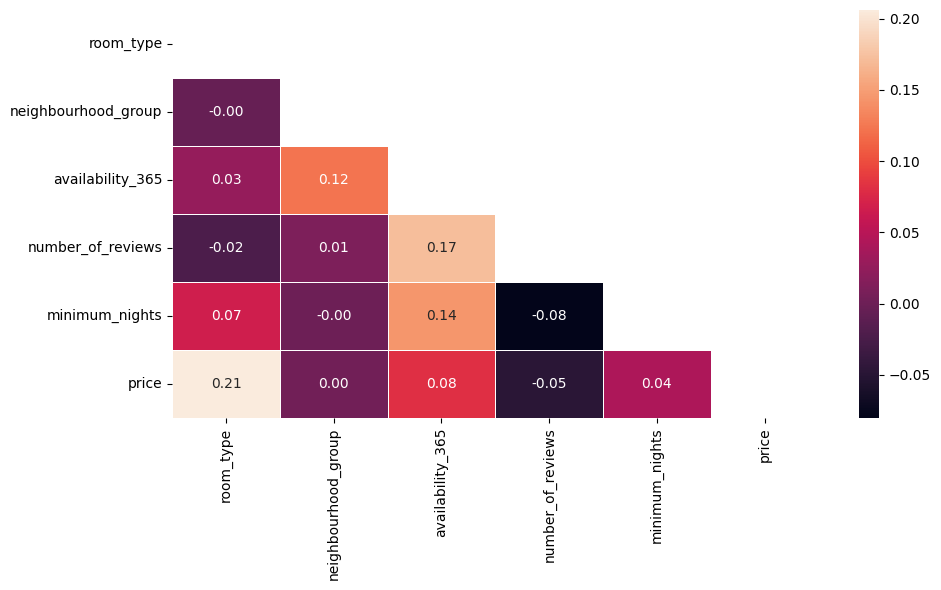

In [36]:
corr = df[['room_type', 'neighbourhood_group', 'availability_365', 'number_of_reviews', 'minimum_nights', 'price']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr, mask=mask, annot=True, linewidths=0.5, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> - El análisis de correlaciones refleja una relación directa entre el tipo del alojamiento (`Room type`) y su precio.
> - Además, se aprecia una relación entre el número de comentarios y disponibilidad (variables `Number of reviews` y `Availability 365`).
> - Tambíen existe la correlación entre el numero de estancia minima y disponibilidad (`Minimum nights` y `Availability 365`)

#### Análisis numérico-categórico (completo)

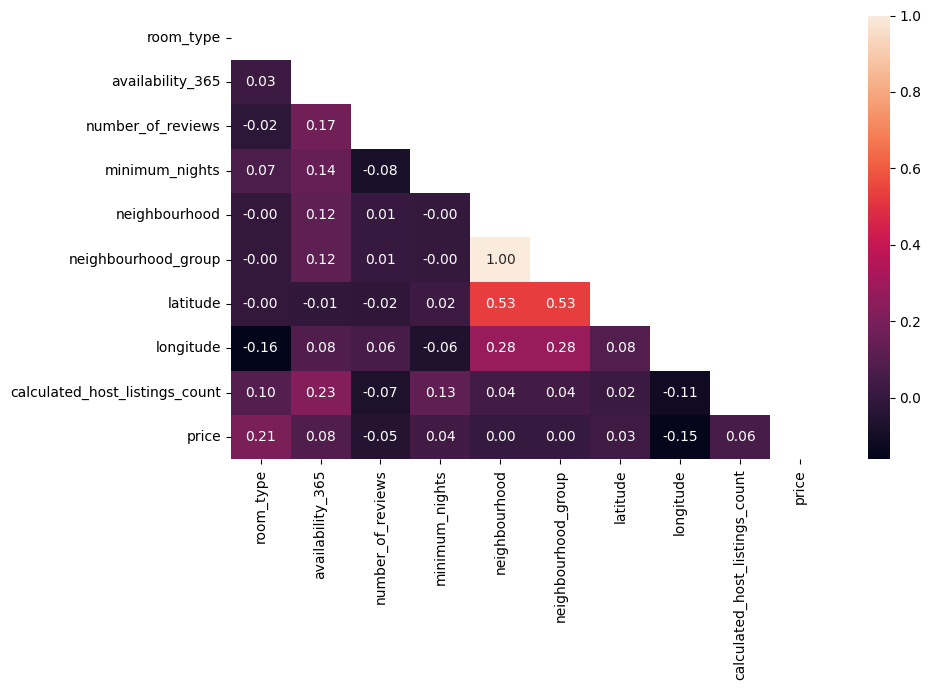

In [37]:
corr = df[['room_type', 'availability_365', 'number_of_reviews', 'minimum_nights', 'neighbourhood', 'neighbourhood_group', 'latitude', 'longitude', 'calculated_host_listings_count', 'price']].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, axis = plt.subplots(figsize=(10, 7))
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f")

plt.tight_layout()
plt.show()

> ##### Observaciones:
>
> - El análisis de correlaciones refleja una relación positiva débil (0.23) entre el número calculado de listados de anfitriones (`Calculated host listings count`) y la disponibilidad. Sugiere que los anfitriones con más listados tienden a tener propiedades más disponibles, posiblemente porque manejan alojamientos profesionales.
> - Número de comentarios (`number_of_reviews`) y la disponibilidad tienen una correlación débil: los apartamentos que tienen más disponibilidad al año sulen tener más comentarios. 
> - El tipo de habitación influye directamente en el precio, aunque la relación es moderada.  

Las correlaciones son en general bajas, lo que indica que el precio no depende fuertemente de una sola variable, sino de una combinación de factores.

## Paso 6: Ingeniería de características

#### Análisis de outliers

In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
neighbourhood_group,48895.0,0.786911,0.844386,0.00000,0.00000,1.00000,1.000000,4.00000
neighbourhood,48895.0,0.786911,0.844386,0.00000,0.00000,1.00000,1.000000,4.00000
latitude,48895.0,40.728949,0.054530,40.49979,40.69010,40.72307,40.763115,40.91306
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
room_type,48895.0,0.567113,0.541249,0.00000,0.00000,1.00000,1.000000,2.00000
price,48895.0,152.720687,240.154170,0.00000,69.00000,106.00000,175.000000,10000.00000
minimum_nights,48895.0,7.029962,20.510550,1.00000,1.00000,3.00000,5.000000,1250.00000
number_of_reviews,48895.0,23.274466,44.550582,0.00000,1.00000,5.00000,24.000000,629.00000
calculated_host_listings_count,48895.0,7.143982,32.952519,1.00000,1.00000,1.00000,2.000000,327.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


> Observaciones
>
> La columna `Price` tiene una media de 152,72, un percentil del 50% igual a 106 y su valor máximo es 10000. Podríamos decir que 10000 parece ser un valor atípico, pero podría ser un error de transcripción. También es posible que el alojamiento más caro tuviera ese precio. Sería útil investigar un poco y confirmar o desmentir esa información.


**Outliers: Visualización**

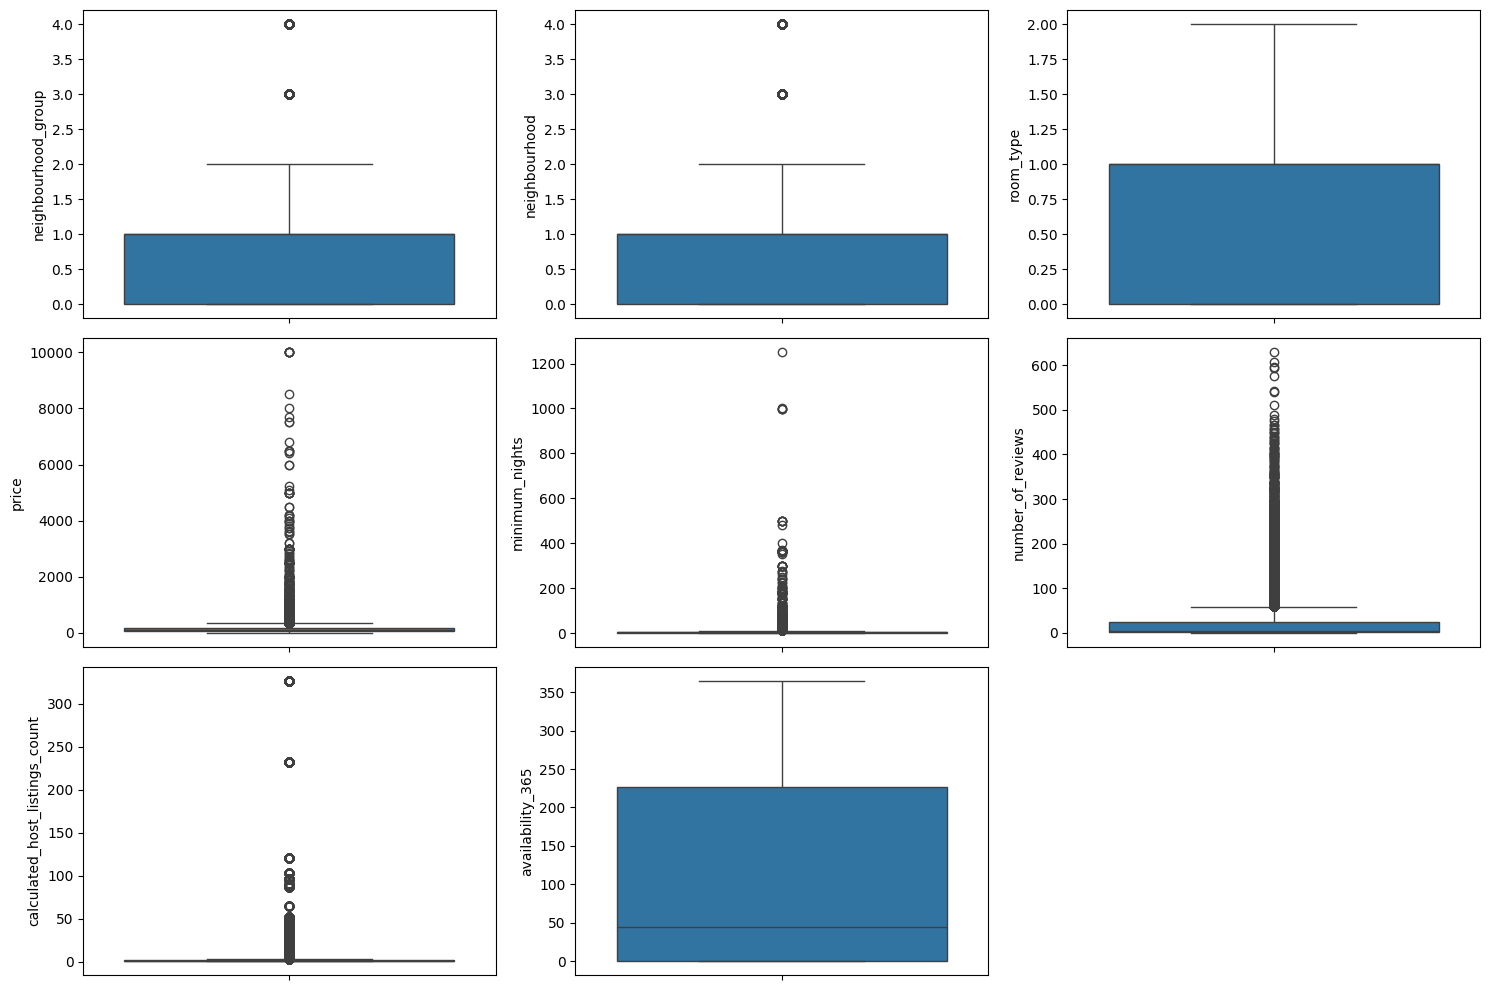

In [39]:
fig, axis = plt.subplots(3, 3, figsize=(15, 10))

sns.boxplot(ax=axis[0, 0], data=df, y='neighbourhood_group')
sns.boxplot(ax=axis[0, 1], data=df, y='neighbourhood')
sns.boxplot(ax=axis[0, 2], data=df, y='room_type')
sns.boxplot(ax=axis[1, 0], data=df, y='price')
sns.boxplot(ax=axis[1, 1], data=df, y='minimum_nights')
sns.boxplot(ax=axis[1, 2], data=df, y='number_of_reviews')
sns.boxplot(ax=axis[2, 0], data=df, y='calculated_host_listings_count')
sns.boxplot(ax=axis[2, 1], data=df, y='availability_365')
fig.delaxes(axis[2, 2])

plt.tight_layout()
plt.show()

> #### Observaciones
>
> Podemos determinar fácilmente que las variables afectadas por outliers son `Price`, `Minimum nights`, `Number of reviews`,  y `Calculated host listings count`. En el caso anterior sobre el precio del alojamiento (columna `Price`) parece que importe de 10000 no es muy común, pero parece que hay más valores bastante más altos que la media. Deberíamos establecer algunos límites superior e inferior para determinar si un punto de datos debe considerarse o no un valor atípico.

In [40]:
price_stats = df["price"].describe()
price_stats

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [41]:
# To calculate the interquartile range: IQR = Q3 (75%) - Q1 (25%)
q1 = df["price"].quantile(0.25)
q3 = df["price"].quantile(0.75)
iqr = q3 - q1

# Set the lower and upper limits
lower_limit = 0 if (q1 - 1.5 * iqr) < 0 else q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr

f"Límites superior: {round(upper_limit, 2)}, límite inferior: {round(lower_limit, 2)}, rango intercuartílico: {round(iqr, 2)}"

'Límites superior: 334.0, límite inferior: 0, rango intercuartílico: 106.0'

> #### Conclusión
>
> Basándonos en estos resultados, deberíamos eliminar los registros de los alojamientos con el precio mayor de los 334. Según los precios que vimos en el diagrama de caja, los valores extremos están por encima de 8000.

In [42]:
# To see how many values represent that extreme value:
df[df["price"] > 8000]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_group,availability_group,neighbourhood_group_numerical,neighbourhood_numerical,room_type_numerical
6530,1,1,40.79264,-73.93898,1,9999,5,1,1,0,>5000,NaN,1,1,1
9151,2,2,40.76810,-73.91651,0,10000,100,2,1,0,>5000,NaN,2,2,0
12342,1,1,40.71355,-73.98507,0,9999,99,6,1,83,>5000,Low (20-100),1,1,0
17692,0,0,40.73260,-73.95739,1,10000,5,5,1,0,>5000,NaN,0,0,1
29238,1,1,40.77213,-73.98665,1,10000,30,0,1,83,>5000,Low (20-100),1,1,1
30268,1,1,40.72197,-74.00633,1,8500,30,2,1,251,>5000,High (>200),1,1,1
40433,1,1,40.71980,-73.98566,1,9999,30,0,1,365,>5000,High (>200),1,1,1


> #### Observaciones
>
> Podemos observar que todos los alojamientos con precios superiores a 8000 tienen establecida una estancia mínima, aunque en algunos casos este valor es inusualmente alto (por ejemplo, 99 o 100 noches), lo cual resulta poco realista considerando que la media general es de aproximadamente 7 noches.
Casi todos los anuncios tienen al menos algunas reseñas, aunque en cantidades bajas, lo que podría indicar que son propiedades con poca rotación o recientemente publicadas.
Por otro lado, llama la atención que varios de estos alojamientos presentan una disponibilidad anual de 0 noches.  
En resumen, estos valores extremos en el precio y en la estancia mínima sugieren que algunos registros podrían no representar comportamientos reales del mercado y convendría analizarlos más a fondo o tratarlos como posibles outliers.


In [43]:
# To come back to the original data frame and check all the details to make a decision
df_original[df_original['price'] > 8000]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
6530,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0
9151,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0
12342,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83
17692,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0
29238,22436899,1-BR Lincoln Center,72390391,Jelena,Manhattan,Upper West Side,40.77213,-73.98665,Entire home/apt,10000,30,0,NaN,NaN,1,83
30268,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251
40433,31340283,2br - The Heart of NYC: Manhattans Lower East ...,4382127,Matt,Manhattan,Lower East Side,40.71980,-73.98566,Entire home/apt,9999,30,0,NaN,NaN,1,365


> #### Observaciones
>
> Comprobando los datos completos, podemos observar que todos los alojamientos, excepto el que tiene un precio de 8500, recibieron su último comentario hace mucho tiempo. Teniendo en cuenta que casi no tienen valoraciones, podríamos llegar a la conclusión de que realmente muestran un valor por defecto, que podría haberse establecido desde el channel manager cuando falló la conexión entre sistemas.  
Otra posibilidad es que el anfitrión haya dejado ese precio intencionadamente, sabiendo que, por el tipo de alojamiento, nadie lo alquilaría a ese importe, asegurándose así de que no se genere ninguna reserva inesperada en caso de que el calendario se vuelva a abrir (un fallo típico que suele ocurrir).  
**El único** alojamiento que **decidimos mantener** es el que tiene un precio de 8500 y se encuentra en Manhattan, ya que cuenta con un comentario reciente y tiene disponibilidad durante los 365 días del año.

In [44]:
# To delete the ones with atypical values
df_clean = df.drop(df[df['price'] > 8500].index)
df_clean

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_group,availability_group,neighbourhood_group_numerical,neighbourhood_numerical,room_type_numerical
0,0,0,40.64749,-73.97237,0,149,1,9,6,365,100-300,High (>200),0,0,0
1,1,1,40.75362,-73.98377,1,225,1,45,2,355,100-300,High (>200),1,1,1
2,1,1,40.80902,-73.94190,0,150,3,0,1,365,100-300,High (>200),1,1,0
3,0,0,40.68514,-73.95976,1,89,1,270,1,194,0-100,Medium (100-200),0,0,1
4,1,1,40.79851,-73.94399,1,80,10,9,1,0,0-100,NaN,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,0,0,40.67853,-73.94995,0,70,2,0,2,9,0-100,Very low (<20),0,0,0
48891,0,0,40.70184,-73.93317,0,40,4,0,2,36,0-100,Low (20-100),0,0,0
48892,1,1,40.81475,-73.94867,1,115,10,0,1,27,100-300,Low (20-100),1,1,1
48893,1,1,40.75751,-73.99112,2,55,1,0,6,2,0-100,Very low (<20),1,1,2


#### Análisis de valores faltantes

In [45]:
df_clean.shape[1]

15

In [46]:
df_clean.isnull().sum() / df_clean.shape[0]

neighbourhood_group               0.000000
neighbourhood                     0.000000
latitude                          0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
calculated_host_listings_count    0.000000
availability_365                  0.000000
price_group                       0.000000
availability_group                0.358567
neighbourhood_group_numerical     0.000000
neighbourhood_numerical           0.000000
room_type_numerical               0.000000
dtype: float64

In [47]:
df_clean.isnull().sum().sort_values(ascending=False)

availability_group                17530
neighbourhood                         0
neighbourhood_group                   0
longitude                             0
room_type                             0
price                                 0
latitude                              0
minimum_nights                        0
number_of_reviews                     0
availability_365                      0
calculated_host_listings_count        0
price_group                           0
neighbourhood_group_numerical         0
neighbourhood_numerical               0
room_type_numerical                   0
dtype: int64

In [48]:
df_clean.isnull().sum().sort_values(ascending=False) / len(df_clean)

availability_group                0.358567
neighbourhood                     0.000000
neighbourhood_group               0.000000
longitude                         0.000000
room_type                         0.000000
price                             0.000000
latitude                          0.000000
minimum_nights                    0.000000
number_of_reviews                 0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
price_group                       0.000000
neighbourhood_group_numerical     0.000000
neighbourhood_numerical           0.000000
room_type_numerical               0.000000
dtype: float64

In [49]:
df_clean[df_clean['availability_group'].isnull()]

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,price_group,availability_group,neighbourhood_group_numerical,neighbourhood_numerical,room_type_numerical
4,1,1,40.79851,-73.94399,1,80,10,9,1,0,0-100,NaN,1,1,1
6,0,0,40.68688,-73.95596,0,60,45,49,1,0,0-100,NaN,0,0,0
8,1,1,40.80178,-73.96723,0,79,2,118,1,0,0-100,NaN,1,1,0
14,1,1,40.73530,-74.00525,1,120,90,27,1,0,100-300,NaN,1,1,1
20,0,0,40.71842,-73.95718,1,299,3,9,1,0,100-300,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48550,2,2,40.69919,-73.89902,0,45,1,0,1,0,0-100,NaN,2,2,0
48731,0,0,40.66716,-73.98101,1,111,8,0,1,0,100-300,NaN,0,0,1
48756,1,1,40.74404,-73.97239,1,129,2,0,1,0,100-300,NaN,1,1,1
48760,2,2,40.74719,-73.91919,0,46,1,0,1,0,0-100,NaN,2,2,0


#### Observaciones

> En este caso no tenemos valores faltantes, según el analisis faltan valores en la columna `Availability_group` pero esta es una columna he hemos creado solamente para un grafico en concreto, la columna `Availability_365`en si no tiene valores faltantes. 

## Paso 7: Split (dos métodos o enfoques)

### Primer Enfoque: Realizar cambios antes de hacer el split de datos

### Realizamos el split

In [50]:
df_clean.shape

(48889, 15)

In [51]:
df_clean.drop(['availability_group', 'price_group', 'neighbourhood_group', 'neighbourhood', 'room_type'], axis=1, inplace=True)
df_clean

,latitude,longitude,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_numerical,neighbourhood_numerical,room_type_numerical
0,40.64749,-73.97237,149,1,9,6,365,0,0,0
1,40.75362,-73.98377,225,1,45,2,355,1,1,1
2,40.80902,-73.94190,150,3,0,1,365,1,1,0
3,40.68514,-73.95976,89,1,270,1,194,0,0,1
4,40.79851,-73.94399,80,10,9,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
48890,40.67853,-73.94995,70,2,0,2,9,0,0,0
48891,40.70184,-73.93317,40,4,0,2,36,0,0,0
48892,40.81475,-73.94867,115,10,0,1,27,1,1,1
48893,40.75751,-73.99112,55,1,0,6,2,1,1,2


In [52]:
# To divide the dataset into training and test samples
X = df_clean.drop('price', axis=1)
y = df_clean['price']

# Instance of: from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=18)

In [53]:
X_train

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_numerical,neighbourhood_numerical,room_type_numerical
1038,40.74826,-73.94633,180,69,1,0,2,2,0
42178,40.73219,-73.98503,4,9,2,233,1,1,1
1002,40.72057,-73.99976,3,134,1,231,1,1,1
37586,40.70686,-73.95538,2,6,2,0,0,0,0
5827,40.70948,-74.00654,7,23,1,116,1,1,0
...,...,...,...,...,...,...,...,...,...
5294,40.82654,-73.94620,1,10,1,297,1,1,1
1726,40.73364,-74.00539,2,68,1,63,1,1,1
35658,40.57973,-73.95799,1,23,5,204,0,0,0
25724,40.77230,-73.98222,2,3,1,2,1,1,1


In [54]:
X_train.columns

Index(['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365',
       'neighbourhood_group_numerical', 'neighbourhood_numerical',
       'room_type_numerical'],
      dtype='object')

In [55]:
y_test.shape

(9778,)

In [56]:
X_train.head()

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_numerical,neighbourhood_numerical,room_type_numerical
1038,40.74826,-73.94633,180,69,1,0,2,2,0
42178,40.73219,-73.98503,4,9,2,233,1,1,1
1002,40.72057,-73.99976,3,134,1,231,1,1,1
37586,40.70686,-73.95538,2,6,2,0,0,0,0
5827,40.70948,-74.00654,7,23,1,116,1,1,0


In [57]:
y_train

1038      50
42178    220
1002     225
37586     48
5827      98
        ... 
5294     125
1726     189
35658     65
25724    200
28951     75
Name: price, Length: 39111, dtype: int64

## Paso 8: Scaling & Encoding

### Scaling - Escalado de valores

#### Escalado Mínimo-Máximo

In [58]:
# Perform scaling with the split dataset
min_max_scaler = MinMaxScaler()

X_train_minmax_scaled = min_max_scaler.fit_transform(X_train)
X_test_minmax_scaled = min_max_scaler.transform(X_test)

In [61]:
df_train_minmax_scaled = pd.DataFrame(X_train_minmax_scaled,
                                      index=X_train.index,
                                      columns=X_train.columns)
df_train_minmax_scaled

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_numerical,neighbourhood_numerical,room_type_numerical
1038,0.602279,0.559620,0.143315,0.116162,0.000000,0.000000,0.50,0.50,0.0
42178,0.563326,0.486581,0.002402,0.015152,0.003067,0.638356,0.25,0.25,0.5
1002,0.535159,0.458782,0.001601,0.225589,0.000000,0.632877,0.25,0.25,0.5
37586,0.501927,0.542540,0.000801,0.010101,0.003067,0.000000,0.00,0.00,0.0
5827,0.508278,0.445986,0.004804,0.038721,0.000000,0.317808,0.25,0.25,0.0
...,...,...,...,...,...,...,...,...,...
5294,0.792025,0.559865,0.000000,0.016835,0.000000,0.813699,0.25,0.25,0.5
1726,0.566840,0.448156,0.000801,0.114478,0.000000,0.172603,0.25,0.25,0.5
35658,0.193770,0.537614,0.000000,0.038721,0.012270,0.558904,0.00,0.00,0.0
25724,0.660550,0.491885,0.000801,0.005051,0.000000,0.005479,0.25,0.25,0.5


In [63]:
df_train_minmax_scaled.value_counts()

latitude  longitude  minimum_nights  number_of_reviews  calculated_host_listings_count  availability_365  neighbourhood_group_numerical  neighbourhood_numerical  room_type_numerical
1.000000  0.658061   0.000000        0.001684           0.006135                        0.490411          1.00                           1.00                     0.0                    1
0.000000  0.003793   0.000801        0.000000           0.000000                        0.997260          0.75                           0.75                     0.0                    1
0.016047  0.023138   0.000000        0.001684           0.000000                        0.819178          0.75                           0.75                     0.5                    1
0.017671  0.000000   0.000801        0.000000           0.000000                        1.000000          0.75                           0.75                     0.0                    1
0.021549  0.005643   0.001601        0.099327           0.000000      

In [62]:
df_test_minmax_scaled = pd.DataFrame(X_test_minmax_scaled,
                                     index=X_test.index,
                                     columns=X_test.columns)
df_test_minmax_scaled

,latitude,longitude,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,neighbourhood_group_numerical,neighbourhood_numerical,room_type_numerical
30349,0.435947,0.634318,0.000000,0.097643,0.015337,0.416438,0.00,0.00,0.0
25220,0.453157,0.456951,0.000000,0.018519,0.000000,0.000000,0.00,0.00,0.5
22795,0.891795,0.604594,0.000801,0.006734,0.000000,0.000000,0.25,0.25,0.0
14578,0.602909,0.668007,0.000000,0.000000,0.000000,0.515068,0.50,0.50,0.0
34554,0.562429,0.493093,0.023219,0.005051,0.003067,0.000000,0.25,0.25,0.0
...,...,...,...,...,...,...,...,...,...
14362,0.715113,0.511456,0.016013,0.018519,0.000000,0.484932,0.25,0.25,0.0
3883,0.279699,0.479580,0.023219,0.047138,0.000000,0.772603,0.00,0.00,0.5
4803,0.473227,0.634885,0.001601,0.378788,0.000000,0.041096,0.00,0.00,0.0
33197,0.592413,0.511437,0.022418,0.001684,0.291411,0.917808,0.25,0.25,0.5


In [64]:
df_test_minmax_scaled.value_counts()

latitude  longitude  minimum_nights  number_of_reviews  calculated_host_listings_count  availability_365  neighbourhood_group_numerical  neighbourhood_numerical  room_type_numerical
1.001745   0.658589  0.000000        0.001684           0.006135                        0.479452          1.00                           1.00                     0.0                    1
0.023367  -0.002963  0.001601        0.001684           0.000000                        0.350685          0.75                           0.75                     0.5                    1
0.075070   0.075303  0.010408        0.000000           0.000000                        0.063014          0.75                           0.75                     0.5                    1
0.105030   0.130166  0.000801        0.011785           0.000000                        0.000000          0.75                           0.75                     0.0                    1
0.112956   0.199657  0.023219        0.015152           0.003067      

### Encoding - Codificación de variables categóricas

#### Label Encoding